In [10]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import time
from mpl_toolkits import mplot3d

## ODE Solver Tests

## Lorenz Attractor/Systems of ODES

In [196]:
def lorenz_scipy(r,t):
    sigma=10;beta=8/3;rho=28
    x,y,z=r
    return sigma*(y-x),x*(rho-z)-y,x*y - beta*z

def lorenz(t,r):
    sigma=10;beta=8/3;rho=28
    x,y,z=r.T
    return np.block([[sigma*((y)-(x))],[(x)*(rho-z)-(y)],[(x)*(y) - beta*(z)]]).T

In [197]:
n=1000
f=np.zeros((n,3))
t=0
dt=0.02
f[0,:] = 1.0
for i in range(n-1):
    f[i+1,:] = f[i,:] + dt*lorenz(t,f[i,:])

In [198]:
n=4000
t=0
dt=0.01
f=np.zeros((n,3))
f[0,:] = 1.0
for i in range(n-1):
    f1=dt*lorenz(t,f[i,:])
    f2=dt*lorenz(t+(dt/2),f[i,:]+(f1/2))
    f3=dt*lorenz(t+(dt/2),f[i,:]+(f2/2))
    f4=dt*lorenz(t+dt,f[i,:]+f3)
    f[i+1,:]=f[i,:]+(f1/6)+(f2/3)+(f3/3)+(f4/6)
    t+=dt
np.savetxt("../lorenz.dat",f)

In [199]:
t=np.arange(0,40,0.01)
rs=odeint(lorenz_scipy,[1,1,1],np.arange(0,40,0.01))

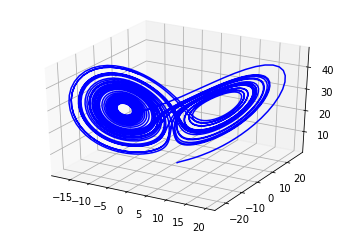

In [200]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
ax.plot(f[:,0], f[:,1], f[:,2],c='b')
plt.show()

In [201]:
x1,y1,z1=np.loadtxt("../lorenz.dat").T

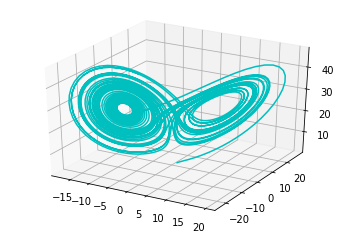

In [202]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(rs[:,0], rs[:,1], rs[:,2],c='r')
# ax.plot(f[:,0], f[:,1], f[:,2],c='b')
ax.plot(x1, y1, z1,c='c')
plt.show()

## ODE Test Problem
### Test Problem
$$y' + 2y = 2 - {{\bf{e}}^{ - 4t}}\hspace{0.25in}y\left( 0 \right) = 1$$
### Exact Solution
$$y\left( t \right) = 1 + \frac{1}{2}{{\bf{e}}^{ - 4t}} - \frac{1}{2}{{\bf{e}}^{ - 2t}}$$

In [32]:
def func(x,y):
    return 2.0-np.exp(-4*x)-2*y
def exact(x):
    return 1.0+0.5*np.exp(-4*x)-0.5*np.exp(-2*x)

### Forward Euler 

In [25]:
# 1+h*func(0,1),yfe[0],exact(x[0])
# for i in range(5):
#     print(yfe[i]+h*func(x[i],yfe[i]),yfe[i+1],exact(x[i+1]))

In [163]:
errs=[];ts_fe=[]
ns=[5*i for i in range(5,15)]
for n in ns:
    a=0;b=1
    yfe=np.zeros(n)
    x=np.linspace(a,b,n)
    yfe[0]=1.0
    dx=(b-a)/(n-1)
    # print("stability",k*h)
    t1=time.time()
    for i in range(n-1):
        yfe[i+1]=yfe[i]+dx*func(x[i],yfe[i])
    t2=time.time()
    ts_fe.append(t2-t1)
    errs.append(relerr(yfe,exact(x)))
    print("Relative L2 Error = ",relerr(yfe,exact(x)))

Relative L2 Error =  0.011393448514644033
Relative L2 Error =  0.009370703152550047
Relative L2 Error =  0.007958152930260741
Relative L2 Error =  0.006915798226891554
Relative L2 Error =  0.006114938186167494
Relative L2 Error =  0.005480345124958531
Relative L2 Error =  0.004965102247081181
Relative L2 Error =  0.0045384292586949666
Relative L2 Error =  0.004179293450175348
Relative L2 Error =  0.0038728337976455802


### RK4

In [164]:
err_rk4=[];ts_rk4=[]
ns=[5*i for i in range(5,15)]
for n in ns:
    dx=(b-a)/(n-1)
    x=np.linspace(a,b,n)
    yrk4=np.zeros(n)
    yrk4[0]=1.0
    t1=time.time()
    for i in range(n-1):
        y1=dx*func(x[i],yrk4[i])
        y2=dx*func(x[i]+(dx/2),yrk4[i]+(y1/2))
        y3=dx*func(x[i]+(dx/2),yrk4[i]+(y2/2))
        y4=dx*func(x[i]+dx,yrk4[i]+y3)
        yrk4[i+1]=yrk4[i]+(y1/6)+(y2/3)+(y3/3)+(y4/6)
    t2=time.time()
    ts_rk4.append(t2-t1)
    err_rk4.append(relerr(yrk4,exact(x)))
    print("Relative L2 Error = ",relerr(yrk4,exact(x)))


Relative L2 Error =  1.0055437828051269e-07
Relative L2 Error =  4.644184204299218e-08
Relative L2 Error =  2.4312196879399515e-08
Relative L2 Error =  1.392966148569543e-08
Relative L2 Error =  8.543819678748839e-09
Relative L2 Error =  5.527141974311386e-09
Relative L2 Error =  3.731946112937826e-09
Relative L2 Error =  2.60992819534368e-09
Relative L2 Error =  1.87963402933932e-09
Relative L2 Error =  1.3878210754602373e-09


### RK2

In [165]:
err_rk2=[];ts_rk2=[]
ns=[5*i for i in range(5,15)]
for n in ns:
    dx=(b-a)/(n-1)
    x=np.linspace(a,b,n)
    yrk2=np.zeros(n)
    yrk2[0]=1.0
    t1=time.time()
    for i in range(n-1):
        y1=dx*func(x[i],yrk2[i])
        y2=dx*func(x[i]+(dx),yrk2[i]+(y1))
        yrk2[i+1]=yrk2[i]+(y1+y2)/2
    t2=time.time()
    ts_rk2.append(t2-t1)
    err_rk2.append(relerr(yrk2,exact(x)))
    print("Relative L2 Error = ",relerr(yrk2,exact(x)))


Relative L2 Error =  8.315774295274754e-05
Relative L2 Error =  5.488754029544991e-05
Relative L2 Error =  3.888896039023783e-05
Relative L2 Error =  2.8975554132368205e-05
Relative L2 Error =  2.2415252078914357e-05
Relative L2 Error =  1.7851890502822092e-05
Relative L2 Error =  1.455094454114952e-05
Relative L2 Error =  1.2086726869927193e-05
Relative L2 Error =  1.0198820667448706e-05
Relative L2 Error =  8.720704244476315e-06


## Timing

In [166]:
tmpls=zip(ts_fe,ts_rk4,ts_rk2)
for tmp1,tmp2 ,tmp3 in tmpls:
    print(tmp1*1e3,tmp2*1e3,tmp3*1e3)

0.05793571472167969 0.25272369384765625 0.1201629638671875
0.07724761962890625 0.3006458282470703 0.16760826110839844
0.07605552673339844 0.4019737243652344 0.1697540283203125
0.08726119995117188 0.46062469482421875 0.1850128173828125
0.09846687316894531 0.4515647888183594 0.2090930938720703
0.1049041748046875 0.5028247833251953 0.23031234741210938
0.12254714965820312 0.5559921264648438 0.25725364685058594
0.16021728515625 0.5769729614257812 0.27298927307128906
0.14591217041015625 0.6449222564697266 0.32591819763183594
0.15354156494140625 0.6878376007080078 0.32448768615722656


## Timing

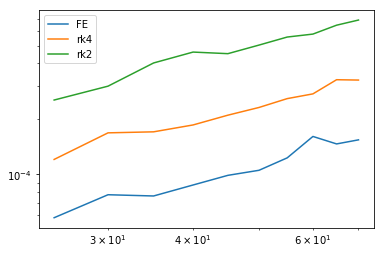

In [167]:
plt.loglog(ns,ts_fe,label='FE')
plt.loglog(ns,ts_rk2,label='rk4')
plt.loglog(ns,ts_rk4,label='rk2')
plt.legend()

### Numerical Solution of ODE Solvers

Text(0, 0.5, 'y(x)')

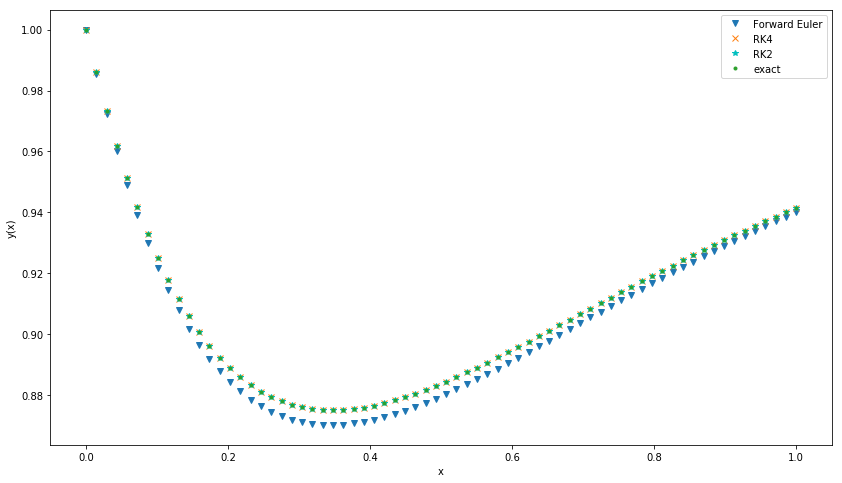

In [168]:
plt.figure(figsize=(14,8))
plt.plot(x,yfe,'v',label='Forward Euler')
plt.plot(x,yrk4,'x',label='RK4')
plt.plot(x,yrk2,'c*',label='RK2')
plt.plot(x,exact(x),'.',label='exact')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')

### Convergence

Order of Accuracy
RK4 4.159754217444606 RK2 2.1901678302977516 Forward Euler 1.0480105502722559
RK4 4.237007686420089 RK2 2.278682558842317 Forward Euler 1.0720090676306495
RK4 4.198636478030479 RK2 2.2353190700698837 Forward Euler 1.059944773429418
RK4 4.170986734062799 RK2 2.2036608502751966 Forward Euler 1.0513522975069836
RK4 4.150107922536761 RK2 2.17952346511825 Forward Euler 1.044919001721117
RK4 4.13378118292152 RK2 2.160507747853374 Forward Euler 1.0399207128215042
RK4 4.120661791294151 RK2 2.1451381702514722 Forward Euler 1.0359248857807168
RK4 4.10988937847201 RK2 2.1324568951387017 Forward Euler 1.032657108036408
RK4 4.100880973258603 RK2 2.121814838353168 Forward Euler 1.0299348327071742
RK4 4.093245817231016 RK2 2.11275644948749 Forward Euler 1.0276318787922425


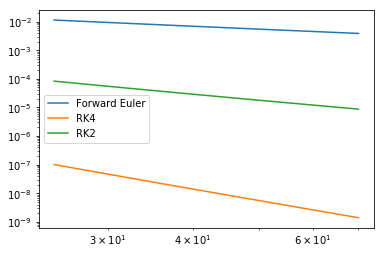

In [169]:
plt.loglog(ns,errs,label='Forward Euler')
plt.loglog(ns,err_rk4,label='RK4')
plt.loglog(ns,err_rk2,label='RK2')
plt.legend()
ps=[]
for i in range(len(ns)):
        prk4=-np.log(err_rk4[i-1]/err_rk4[i])/np.log(ns[i-1]/ns[i])
        prk2=-np.log(err_rk2[i-1]/err_rk2[i])/np.log(ns[i-1]/ns[i])
        pfe=-np.log(errs[i-1]/errs[i])/np.log(ns[i-1]/ns[i])
        ps.append([prk4,prk2,pfe])

print("Order of Accuracy")
for ork4,ork2,ofe in ps:
    print("RK4",ork4,"RK2",ork2,"Forward Euler",ofe)

## Member Functions

### Helper Functions

In [170]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

### Solvers

Text(0, 0.5, 'y(x)')

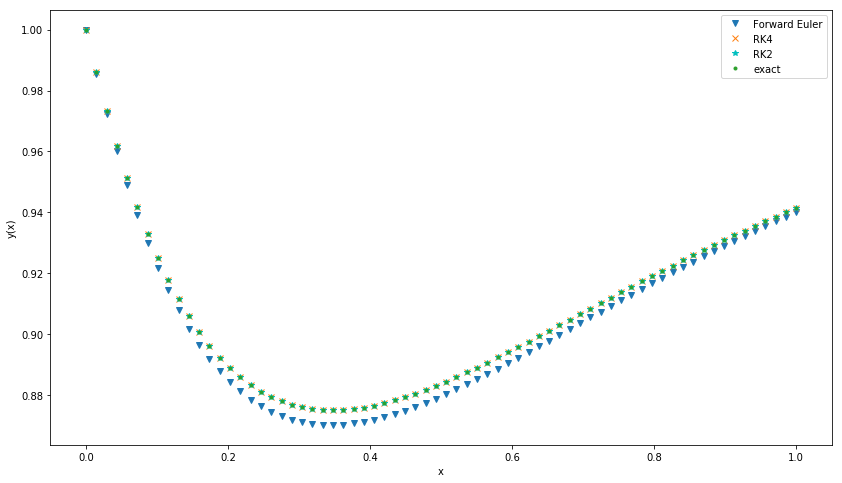

In [171]:
plt.figure(figsize=(14,8))
plt.plot(tt,yt0,'v',label='Forward Euler')
plt.plot(tt,yt1,'x',label='RK4')
plt.plot(tt,yt2,'c*',label='RK2')
plt.plot(tt,exact(tt),'.',label='exact')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x)')

In [173]:
errs=[];ts=[]
ns=[5*i for i in range(5,15)]
for n in ns:
#     t1=time.time()
    yt2=rk2(func,1,a,b,n)
    yt0=forward_euler(func,1,a,b,n)
    yt1=rk4(func,1,a,b,n)
    tt=np.linspace(a,b,n)
#     t2=time.time()
#     ts.append(t2-t1)
    errs.append([relerr(yt0[:,0],exact(tt)),\
                 relerr(yt1[:,0],exact(tt)),\
                 relerr(yt2[:,0],exact(tt))])
errs=np.array(errs)
#     print("Relative L2 Error = ",relerr(yt0[:,0],exact(tt)))


Order of Accuracy
RK4 1.0480105502722559 RK2 4.159754217444606 Forward Euler 2.1901678302977516
RK4 1.0720090676306495 RK2 4.237007686420089 Forward Euler 2.278682558842317
RK4 1.059944773429418 RK2 4.198636478030479 Forward Euler 2.2353190700698837
RK4 1.0513522975069836 RK2 4.170986734062799 Forward Euler 2.2036608502751966
RK4 1.044919001721117 RK2 4.150107922536761 Forward Euler 2.17952346511825
RK4 1.0399207128215042 RK2 4.13378118292152 Forward Euler 2.160507747853374
RK4 1.0359248857807168 RK2 4.120661791294151 Forward Euler 2.1451381702514722
RK4 1.032657108036408 RK2 4.10988937847201 Forward Euler 2.1324568951387017
RK4 1.0299348327071742 RK2 4.100880973258603 Forward Euler 2.121814838353168
RK4 1.0276318787922425 RK2 4.093245817231016 Forward Euler 2.11275644948749


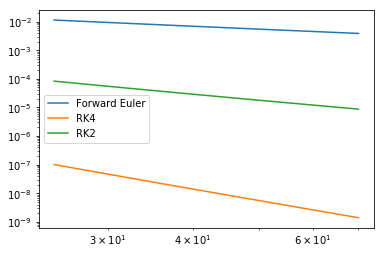

In [193]:
plt.loglog(ns,errs[:,0],label='Forward Euler')
plt.loglog(ns,errs[:,1],label='RK4')
plt.loglog(ns,errs[:,-1],label='RK2')
plt.legend()
ps=[]
for j in range(len(errs[0,:])):
#     print(j)
    etmp=errs[:,j]
#     print(etmp)
    for i in range(len(ns)):
        p=-np.log(etmp[i-1]/etmp[i])/np.log(ns[i-1]/ns[i])
        ps.append(p)
ps = np.array(ps).reshape(errs.T.shape)


ords=zip(ps[0,:].tolist(),\
    ps[1,:].tolist(),\
    ps[2,:].tolist())
print("Order of Accuracy")
for ork4,ork2,ofe in ords:
    print("RK4",ork4,"RK2",ork2,"Forward Euler",ofe)

In [143]:
def rk2(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (b-a)/(n-1)
    unknowns = initial_condition
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
 
    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+k,u[i,:]+u1)
        u[i+1,:]=u[i]+(u1+u2)/2
    return u

def rk4(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (b-a)/(n-1)
    unknowns = initial_condition
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
    
    for i in range(n-1):
        u1=k*f(t[i],u[i,:])
        u2=k*f(t[i]+(k/2),u[i,:]+(u1/2))
        u3=k*f(t[i]+(k/2),u[i,:]+(u2/2))
        u4=k*f(t[i]+k,u[i,:]+u3)
        u[i+1,:]=u[i]+(u1/6)+(u2/3)+(u3/3)+(u4/6)
    return u

def forward_euler(f,initial_condition,ti,tf,n):
    t = np.linspace(ti,tf,n)
    k = (b-a)/(n-1)
    unknowns = initial_condition
    u = np.zeros((n,unknowns))
    u[0,:] = initial_condition
       
    for i in range(n-1):
        u[i+1,:]=u[i,:]+k*f(t[i],u[i,:])
        
    return u